<a id="5"></a>


<font color="black" size=+1><b> SISTEM REKOMENDASII TEMPAT PARIWISATA TOBA </b></font>

<a id="4"></a>

---
<font color="BLUE" size=+1><b>  Kelompok 7  </b></font>

---
    Nama Anggota
    1. 12S21039 Widya Indah Sari Manurung
    2. 12S21056 Endang Siregar
    3. 12S21060 Glory Natasya Hutahaean


####**Data Preparation**

pada data perparation bertujuan untuk menginport library yang digunakan dalam memproses data dan juga membaca data

In [ ]:
# Import libraries yang diperlukan
import pandas as pd
import numpy as np
import scipy.sparse as sp
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df = pd.read_csv ('Tempat-Wisata-Toba-Preprocessing.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,address,PlaceID,Nama_tempat_wisata,Category,ReviewerId,Rating,Reviews
0,0,0,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.126030e+20,5.0,NaN
1,1,1,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.119090e+20,5.0,bagus
2,2,2,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.078860e+20,5.0,NaN
3,3,3,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.130720e+20,5.0,sangat menyenagkan
4,4,4,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.061730e+20,5.0,bebas foto dimana aja cuma 2k


####**Membagi data menjadi Train, Validation, dan Test**

pada kode dibawah digunaka untuk membagi dataset menjadi tiga subset, yaitu data **Training**, **Validation**, dan **Testing** dengan proporsi tertentu. Pertama, ditentukan ukuran dari masing-masing subset berdasarkan persentase: 70% data akan digunakan untuk training, 15% untuk validation, dan sisa 15% untuk testing. Variabel `train_size` dihitung sebagai 70% dari total data, `val_size` dihitung sebagai 15% dari total data, dan `test_size` dihitung sebagai sisa dari total data setelah dikurangi `train_size` dan `val_size`.

Setelah menentukan ukuran untuk setiap subset, data kemudian dibagi sesuai indeks. Data **Training** (`train_df`) diambil dari baris awal hingga `train_size`, sedangkan data **Validation** (`val_df`) diambil mulai dari `train_size` hingga `train_size + val_size`. Data **Testing** (`test_df`) mencakup sisa data mulai dari `train_size + val_size` hingga baris terakhir dataset.

In [ ]:
# Load dataset
data = pd.read_csv('Tempat-Wisata-Toba-Preprocessing.csv')

# Menghitung ukuran dataset untuk train, validation, dan test
train_size = int(0.7 * len(data))  # 70% data untuk training
val_size = int(0.15 * len(data))   # 15% data untuk validation
test_size = len(data) - train_size - val_size  # Sisa untuk testing

# Membagi data ke dalam Train, Validation, dan Test
train_df = data[:train_size]
val_df = data[train_size:train_size + val_size]
test_df = data[train_size + val_size:]

# Save split data
train_df.to_csv("/content/train_data.csv", index=False)
val_df.to_csv("/content/validation_data.csv", index=False)
test_df.to_csv("/content/test_data.csv", index=False)

print("Data berhasil dipisah dan disimpan!")





Data berhasil dipisah dan disimpan!


In [ ]:
# Load split data
train_data = pd.read_csv("/content/train_data.csv")
validation_data = pd.read_csv("/content/validation_data.csv")
test_data = pd.read_csv("/content/test_data.csv")

# Display the first few rows of each dataset
print("Train Data:")
display(train_data.head())

print("\nValidation Data:")
display(validation_data.head())

print("\nTest Data:")
display(test_data.head())

Train Data:


,Unnamed: 0.1,Unnamed: 0,address,PlaceID,Nama_tempat_wisata,Category,ReviewerId,Rating,Reviews
0,0,0,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.126030e+20,5.0,NaN
1,1,1,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.119090e+20,5.0,bagus
2,2,2,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.078860e+20,5.0,NaN
3,3,3,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.130720e+20,5.0,sangat menyenagkan
4,4,4,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.061730e+20,5.0,bebas foto dimana aja cuma 2k



Validation Data:


,Unnamed: 0.1,Unnamed: 0,address,PlaceID,Nama_tempat_wisata,Category,ReviewerId,Rating,Reviews
0,30258,30258,"GPM3+RM4, Dolok Raja, Kec. Harian, Kabupaten S...",91,Bukit Holbung Samosir,Wisata Alam,1.012390e+20,4.0,superb scenery but the road on the way to buki...
1,30259,30259,"GPM3+RM4, Dolok Raja, Kec. Harian, Kabupaten S...",91,Bukit Holbung Samosir,Wisata Alam,1.136170e+20,5.0,mantap
2,30260,30260,"GPM3+RM4, Dolok Raja, Kec. Harian, Kabupaten S...",91,Bukit Holbung Samosir,Wisata Alam,1.028330e+20,3.0,tempat yang sangat imazing ciptaan tuhan\nkepi...
3,30261,30261,"GPM3+RM4, Dolok Raja, Kec. Harian, Kabupaten S...",91,Bukit Holbung Samosir,Wisata Alam,1.057040e+20,5.0,NaN
4,30262,30262,"GPM3+RM4, Dolok Raja, Kec. Harian, Kabupaten S...",91,Bukit Holbung Samosir,Wisata Alam,1.032090e+20,5.0,recommended\n\nditerjemahkan oleh google\ndire...



Test Data:


,Unnamed: 0.1,Unnamed: 0,address,PlaceID,Nama_tempat_wisata,Category,ReviewerId,Rating,Reviews
0,36741,36741,"Jl. Dr. TB. Silalahi No.88, Silalahi Pagar Bat...",96,Museum Batak Tb Silalahi Center,Wisata Budaya,1.113220e+20,5.0,NaN
1,36742,36742,"Jl. Dr. TB. Silalahi No.88, Silalahi Pagar Bat...",96,Museum Batak Tb Silalahi Center,Wisata Budaya,1.080460e+20,3.0,NaN
2,36743,36743,"Jl. Dr. TB. Silalahi No.88, Silalahi Pagar Bat...",96,Museum Batak Tb Silalahi Center,Wisata Budaya,1.135900e+20,4.0,NaN
3,36744,36744,"Jl. Dr. TB. Silalahi No.88, Silalahi Pagar Bat...",96,Museum Batak Tb Silalahi Center,Wisata Budaya,1.154770e+20,5.0,NaN
4,36745,36745,"Jl. Dr. TB. Silalahi No.88, Silalahi Pagar Bat...",96,Museum Batak Tb Silalahi Center,Wisata Budaya,1.042460e+20,4.0,koleksi pribadi almarhum bapak tb silalahi dan...


#### **Membuat Matriks Pengguna-Item untuk Train, Validation, dan Test**

Kode di bawah bertujuan untuk membentuk **matriks pengguna-item** untuk data **train**, **validation**, dan **test**. Matriks ini akan merepresentasikan interaksi antara pengguna (`ReviewerId`) dan tempat wisata (`PlaceID`) dengan nilai rating yang diberikan oleh pengguna untuk masing-masing tempat wisata. Setiap subset data (train, validation, dan test) diubah menjadi matriks yang menunjukkan pengguna sebagai baris dan tempat wisata sebagai kolom, dengan nilai dalam matriks berupa rating. Nilai rating yang kosong (karena pengguna belum memberikan rating pada tempat wisata tertentu) akan diisi dengan nilai 0.

#### Membuat Matriks Pivot untuk Train, Validation, dan Test

Pertama, kode membuat matriks pivot menggunakan fungsi `pivot_table()` untuk setiap subset data (`train_df`, `val_df`, dan `test_df`). Proses ini dilakukan dengan menjadikan `ReviewerId` sebagai indeks baris (representasi pengguna), `PlaceID` sebagai kolom (representasi tempat wisata), dan `Rating` sebagai nilai matriks. Jika ada lebih dari satu nilai rating untuk pasangan pengguna dan tempat wisata yang sama, maka akan diambil nilai rata-rata rating menggunakan `aggfunc='mean'`. Selanjutnya, nilai `NaN` atau nilai kosong pada matriks akan diisi dengan `0` menggunakan `fillna(0)` untuk menghindari kekosongan dalam matriks.

#### Menampilkan Bentuk Matriks untuk Setiap Subset

Setelah matriks pengguna-item untuk train, validation, dan test terbentuk, kode menampilkan ukuran atau bentuk dari setiap matriks dengan mencetak jumlah baris dan kolom. Hasilnya menunjukkan sebagai berikut:
- Matriks Pengguna-Item untuk **Train** memiliki ukuran `(13182, 91)`, yang berarti terdapat 13.182 pengguna (ReviewerId) dan 91 tempat wisata (PlaceID) yang dinilai dalam data training.
- Matriks Pengguna-Item untuk **Validation** memiliki ukuran `(5215, 6)`, menunjukkan ada 5.215 pengguna dan 6 tempat wisata dalam data validation.
- Matriks Pengguna-Item untuk **Test** memiliki ukuran `(5207, 6)`, dengan 5.207 pengguna dan 6 tempat wisata pada data test.

#### Menampilkan Matriks Data

Kode berikutnya digunakan untuk menampilkan matriks pengguna-item untuk setiap subset data (`train_matrix`, `val_matrix`, dan `test_matrix`). Contoh output yang ditampilkan menunjukkan sebagian matriks pengguna-item, di mana:
- Pada matriks training, setiap baris mewakili pengguna dan setiap kolom mewakili tempat wisata. Nilai dalam matriks adalah rating yang diberikan oleh pengguna terhadap tempat wisata. Jika pengguna belum memberikan rating, maka nilainya akan muncul sebagai `0.0`.
- Matriks validation dan test memiliki tampilan serupa, namun dengan jumlah kolom (tempat wisata) yang lebih sedikit, karena hanya ada 6 tempat wisata dalam subset data validation dan test.


In [ ]:
train_matrix = train_df.pivot_table(index='ReviewerId', columns='PlaceID', values='Rating', aggfunc='mean').fillna(0) # Use pivot_table with aggfunc
val_matrix = val_df.pivot_table(index='ReviewerId', columns='PlaceID', values='Rating', aggfunc='mean').fillna(0) # Use pivot_table with aggfunc
test_matrix = test_df.pivot_table(index='ReviewerId', columns='PlaceID', values='Rating', aggfunc='mean').fillna(0) # Use pivot_table with aggfunc

# Menampilkan bentuk matriks untuk Train, Validation, dan Test
print('Matriks Pengguna-Item Train:', train_matrix.shape)
print('Matriks Pengguna-Item Validation:', val_matrix.shape)
print('Matriks Pengguna-Item Test:', test_matrix.shape)


Matriks Pengguna-Item Train: (13182, 91)
Matriks Pengguna-Item Validation: (5215, 6)
Matriks Pengguna-Item Test: (5207, 6)


In [ ]:
all_place_ids = pd.concat([train_df['PlaceID'], val_df['PlaceID'], test_df['PlaceID']]).unique()
all_reviewer_ids = pd.concat([train_df['ReviewerId'], val_df['ReviewerId'], test_df['ReviewerId']]).unique()

In [ ]:
train_matrix = train_df.pivot_table(index='ReviewerId', columns='PlaceID', values='Rating', aggfunc='mean').fillna(0)
val_matrix = val_df.pivot_table(index='ReviewerId', columns='PlaceID', values='Rating', aggfunc='mean').fillna(0)
test_matrix = test_df.pivot_table(index='ReviewerId', columns='PlaceID', values='Rating', aggfunc='mean').fillna(0)

In [ ]:
# menampilkan matrix data train
print("Matriks Pengguna-Item Train:")
print(train_matrix.head(10))

Matriks Pengguna-Item Train:
PlaceID        0    1    2    3    4    5    6    8    9    10  ...   82   83  \
ReviewerId                                                      ...             
1.000010e+20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1.000030e+20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1.000050e+20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1.000070e+20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1.000090e+20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1.000110e+20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1.000120e+20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1.000130e+20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1.000140e+20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1.000150e+20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

In [ ]:
# Menampilkan matriks data validation
print("Matriks Pengguna-Item Validation:")
print(val_matrix.head(10))

Matriks Pengguna-Item Validation:
PlaceID        91   92   93   94   95   96
ReviewerId                                
1.000020e+20  0.0  0.0  5.0  0.0  0.0  0.0
1.000040e+20  5.0  0.0  0.0  0.0  0.0  0.0
1.000090e+20  0.0  0.0  0.0  5.0  0.0  0.0
1.000100e+20  0.0  0.0  0.0  0.0  4.0  5.0
1.000120e+20  0.0  0.0  0.0  0.0  5.0  0.0
1.000160e+20  0.0  0.0  0.0  0.0  0.0  4.0
1.000230e+20  0.0  5.0  0.0  0.0  0.0  0.0
1.000250e+20  0.0  0.0  0.0  0.0  5.0  0.0
1.000260e+20  0.0  0.0  0.0  0.0  5.0  0.0
1.000280e+20  0.0  0.0  4.0  0.0  3.0  0.0


In [ ]:
# Menampilkan matriks data test
print("Matriks Pengguna-Item Testing:")
print(test_matrix.head(10))

Matriks Pengguna-Item Testing:
PlaceID       96   97   98   99   100  101
ReviewerId                                
1.000030e+20  0.0  0.0  4.0  0.0  0.0  0.0
1.000090e+20  0.0  0.0  0.0  5.0  0.0  0.0
1.000100e+20  0.0  0.0  0.0  0.0  0.0  5.0
1.000120e+20  0.0  0.0  0.0  0.0  0.0  5.0
1.000180e+20  0.0  0.0  0.0  5.0  0.0  0.0
1.000240e+20  5.0  0.0  0.0  0.0  0.0  0.0
1.000260e+20  0.0  0.0  5.0  0.0  0.0  0.0
1.000270e+20  0.0  0.0  5.0  0.0  5.0  5.0
1.000300e+20  0.0  0.0  5.0  0.0  0.0  0.0
1.000340e+20  0.0  0.0  0.0  0.0  0.0  5.0


**Alternating Least Squares (ALS)**

Alternating Least Squares (ALS) merupakan sebuah  algoritma yang digunakan untuk memecahkan masalah dalam sistem rekomendasi, khususnya pada Collaborative Filtering. ALS banyak digunakan dalam aplikasi rekomendasi, seperti Netflix, Amazon, dan Spotify, untuk memprediksi item apa yang mungkin disukai oleh pengguna berdasarkan preferensi yang telah ada.
Alternating Least Squares (ALS) adalah teknik model-based Collaborative Filtering yang menggunakan optimasi berbasis least squares untuk melakukan matrix factorization dan membuat rekomendasi Dalam konteks ini, ALS digunakan untuk menemukan latent factors yang mewakili preferensi pengguna dan karakteristik item. ALS mengoptimalkan dua matriks:

User matrix (P): Representasi fitur pengguna.
Item matrix (Q): Representasi fitur item.

### Konversi ke Matriks Sparse

Kode ini mengonversi data pengguna-item menjadi matriks sparse dan melatih model rekomendasi **Alternating Least Squares (ALS)** menggunakan pustaka `implicit`. Pertama, pustaka `implicit` diinstal dan diimpor, bersama `csr_matrix` dari `scipy.sparse` untuk membuat matriks dalam format **Compressed Sparse Row (CSR)**, yang efisien dalam menyimpan data sparse. Selanjutnya, dibuat pivot table (`user_item_matrix`) dari dataset asli dengan `ReviewerId` sebagai indeks baris, `PlaceID` sebagai kolom, dan `Rating` sebagai nilai. Jika ada beberapa rating untuk pasangan pengguna-tempat yang sama, nilai rata-rata diambil. Nilai `NaN` diisi dengan `0` menggunakan `fillna(0)` untuk memastikan tidak ada nilai kosong.

Matriks pengguna-item ini kemudian dikonversi menjadi format sparse (`sparse_matrix`) dan digunakan untuk melatih model ALS. Model ALS dikonfigurasi dengan beberapa parameter, seperti `factors=50` (jumlah faktor laten), `regularization=0.1` (regulasi untuk mencegah overfitting), `iterations=20` (jumlah iterasi pelatihan), dan `random_state=42` (untuk hasil yang konsisten). Dengan `als.fit(sparse_matrix)`, model ALS dilatih untuk menemukan pola laten antara pengguna dan tempat wisata berdasarkan data rating yang tersedia.

In [ ]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, recall_score, precision_score, average_precision_score
from math import sqrt
import implicit

# Simulasi Data
# Pastikan user_item_matrix, train_matrix, val_matrix, test_matrix sudah dalam format DataFrame
# Contoh Data
data = {
    'user_id': [0, 0, 1, 1, 2, 2],
    'place_id': [0, 1, 0, 2, 1, 2],
    'rating': [4, 5, 3, 2, 5, 4]
}
user_item_matrix = pd.DataFrame(data)
user_item_matrix = user_item_matrix.pivot(index='user_id', columns='place_id', values='rating').fillna(0)

# Convert ke Matriks Sparse
sparse_matrix = csr_matrix(user_item_matrix.values)

# Bagi data menjadi train, validation, dan test (dummy untuk contoh)
train_matrix = user_item_matrix.copy()  # Biasanya hanya sebagian data
val_matrix = user_item_matrix.copy()  # Biasanya data validasi
test_matrix = user_item_matrix.copy()  # Biasanya data uji

# Step 3: Initialize ALS Model
als = implicit.als.AlternatingLeastSquares(factors=50, regularization=0.1, iterations=20, random_state=42)

# Step 4: Train the ALS model
als.fit(sparse_matrix)

# Step 5: Evaluate Model
# Evaluasi Model
def evaluate_model(model, train_matrix, val_matrix, test_matrix, sparse_matrix):
    results = {}

    for name, matrix in zip(['train', 'val', 'test'], [train_matrix, val_matrix, test_matrix]):
        # Ambil indeks pengguna dan tempat dari matriks
        user_ids = matrix.index.tolist()
        place_ids = matrix.columns.tolist()

        # Validasi indeks
        num_users, num_items = sparse_matrix.shape
        predictions = []
        true_ratings = []

        for user_id in user_ids:
            user_id_int = int(user_id)
            if user_id_int >= num_users:
                print(f"Invalid user_id: {user_id_int}. Skipping.")
                continue

            user_interactions = sparse_matrix[user_id_int]

            for place_id in place_ids:
                if place_id >= num_items:
                    print(f"Invalid place_id: {place_id}. Skipping.")
                    continue

                # Rekomendasi untuk user
                recs = model.recommend(userid=user_id_int, user_items=user_interactions, N=10)

                # Iterasi setiap rekomendasi
                for rec in recs:
                    place, score = rec[0], rec[1]  # Ambil item_id dan skor
                    predictions.append(score)
                    true_ratings.append(matrix.iloc[user_id, place_id])  # Nilai sebenarnya

        # Hitung RMSE dan MAE
        rmse = sqrt(mean_squared_error(true_ratings, predictions))
        mae = mean_absolute_error(true_ratings, predictions)

        # Hitung Recall, Precision, dan MAP
        threshold = 3  # Contoh threshold
        true_relevance = (np.array(true_ratings) > threshold).astype(int)
        predicted_relevance = (np.array(predictions) > threshold).astype(int)

        recall = recall_score(true_relevance, predicted_relevance, zero_division=0)
        precision = precision_score(true_relevance, predicted_relevance, zero_division=0)
        map_score = average_precision_score(true_relevance, predicted_relevance)

        # Simpan hasil evaluasi
        results[name] = {
            'rmse': rmse,
            'mae': mae,
            'recall': recall,
            'precision': precision,
            'map': map_score
        }

    return results


# Evaluasi Model
evaluation_results = evaluate_model(als, train_matrix, val_matrix, test_matrix, sparse_matrix)

# Tampilkan Hasil Evaluasi
print("Evaluation Results:")
for dataset, metrics in evaluation_results.items():
    print(f"\n{dataset.upper()} Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


  0%|          | 0/20 [00:00<?, ?it/s]

Evaluation Results:

TRAIN Metrics:
rmse: 240615954826175139445261144285280993280.0000
mae: 170141173319264429905852091742258462720.0000
recall: 0.0000
precision: 0.0000
map: 0.4444

VAL Metrics:
rmse: 240615954826175139445261144285280993280.0000
mae: 170141173319264429905852091742258462720.0000
recall: 0.0000
precision: 0.0000
map: 0.4444

TEST Metrics:
rmse: 240615954826175139445261144285280993280.0000
mae: 170141173319264429905852091742258462720.0000
recall: 0.0000
precision: 0.0000
map: 0.4444


In [ ]:
import numpy as np
import scipy.sparse as sparse
import implicit

# Step 3: Initialize the ALS model
als = implicit.als.AlternatingLeastSquares(factors=50,  # Number of latent factors
                                           regularization=0.1,  # Regularization strength
                                           iterations=20,  # Number of iterations
                                           random_state=42)  # For reproducibility

# Step 4: Train the ALS model using the sparse matrix
als.fit(sparse_matrix)

  0%|          | 0/20 [00:00<?, ?it/s]

## **Evaluasi Model**

In [ ]:
from scipy.sparse import csr_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Fungsi untuk mendapatkan prediksi dari model
def get_predictions(user_ids, item_ids, model):
    predictions = []
    for user, item in zip(user_ids, item_ids):
        try:
            user_factors = model.user_factors[user]
            if item < model.item_factors.shape[0]:
                item_factors = model.item_factors[item]
                pred = np.dot(user_factors, item_factors)
            else:
                pred = np.nan  # Assign NaN if item not found in model
        except IndexError:
            pred = np.nan  # Assign NaN if user/item not found in model
        predictions.append(pred)

    # Ganti semua NaN dengan 0 di prediksi
    return np.nan_to_num(predictions)

# Fungsi untuk menyiapkan data
def prepare_data(df):
    user_ids = df['ReviewerId'].astype("category").cat.codes.values
    item_ids = df['PlaceID'].astype("category").cat.codes.values
    ratings = df['Rating'].values
    return user_ids, item_ids, ratings

# Fungsi evaluasi untuk keseluruhan data
def evaluate_model(df, model, sparse_matrix, k=10):
    user_ids, item_ids, true_ratings = prepare_data(df)
    predicted_ratings = get_predictions(user_ids, item_ids, model)

    # Ganti semua NaN pada true_ratings dan predicted_ratings dengan 0
    true_ratings = np.nan_to_num(true_ratings)
    predicted_ratings = np.nan_to_num(predicted_ratings)

    # Menghitung RMSE dan MAE
    rmse_score = np.sqrt(mean_squared_error(true_ratings, predicted_ratings))
    mae_score = mean_absolute_error(true_ratings, predicted_ratings)

    # Recall, Precision, dan MAP untuk setiap pengguna
    recalls = []
    precisions = []
    maps = []
    unique_user_ids = np.unique(user_ids)

    for user_id in unique_user_ids:
        # Pastikan hanya satu baris yang dipilih untuk setiap user_id dalam bentuk CSR
        user_interactions = sparse_matrix[user_id].tocsr()

        # Mengambil rekomendasi dari model
        recommendations = model.recommend(user_id, user_interactions, N=k)

        # Pastikan rekomendasi hanya berupa daftar item
        recommended_items = [rec[0] for rec in recommendations]

        # Mendapatkan item yang sebenarnya diberikan rating oleh user_id
        actual_items = item_ids[user_ids == user_id]

        # Menghitung metrik evaluasi
        recalls.append(recall_at_k(actual_items, recommended_items, k))
        precisions.append(precision_at_k(actual_items, recommended_items, k))
        maps.append(mean_average_precision(actual_items, recommended_items, k))

    # Rata-rata hasil evaluasi
    avg_recall = np.mean(recalls)
    avg_precision = np.mean(precisions)
    avg_map = np.mean(maps)

    return rmse_score, mae_score, avg_recall, avg_precision, avg_map

# Evaluasi untuk keseluruhan data
rmse_score, mae_score, avg_recall, avg_precision, avg_map = evaluate_model(combined_df, als, sparse_matrix, k=10)

# Menampilkan hasil evaluasi
print(f"Overall RMSE: {rmse_score}")
print(f"Overall MAE: {mae_score}")
print(f"Overall Recall@10: {avg_recall}")
print(f"Overall Precision@10: {avg_precision}")
print(f"Overall MAP@10: {avg_map}")


Overall RMSE: 3.0397353397908478
Overall MAE: 2.849736134211222
Overall Recall@10: 0.0
Overall Precision@10: 0.0
Overall MAP@10: 0.0


Kode di atas menggambarkan evaluasi model **ALS (Alternating Least Squares)** yang dilatih menggunakan matriks sparse dari data interaksi pengguna dan tempat wisata. Fungsi `get_predictions` menghitung prediksi rating dengan mengalikan vektor faktor laten pengguna dan item. Data disiapkan dengan mengonversi ID pengguna dan item menjadi kategori numerik menggunakan fungsi `prepare_data`. Fungsi `evaluate_model` menghitung metrik evaluasi seperti **RMSE** dan **MAE** untuk mengukur kesalahan prediksi secara keseluruhan, serta **Recall@10**, **Precision@10**, dan **Mean Average Precision (MAP@10)** untuk menilai kualitas rekomendasi pada tingkat pengguna. Hasil evaluasi dihitung sebagai rata-rata dari semua pengguna, memberikan wawasan tentang performa model dalam merekomendasikan tempat wisata. Output evaluasi ditampilkan untuk memahami akurasi dan relevansi rekomendasi yang dihasilkan oleh model.

## **Visualisasi Performa Model**

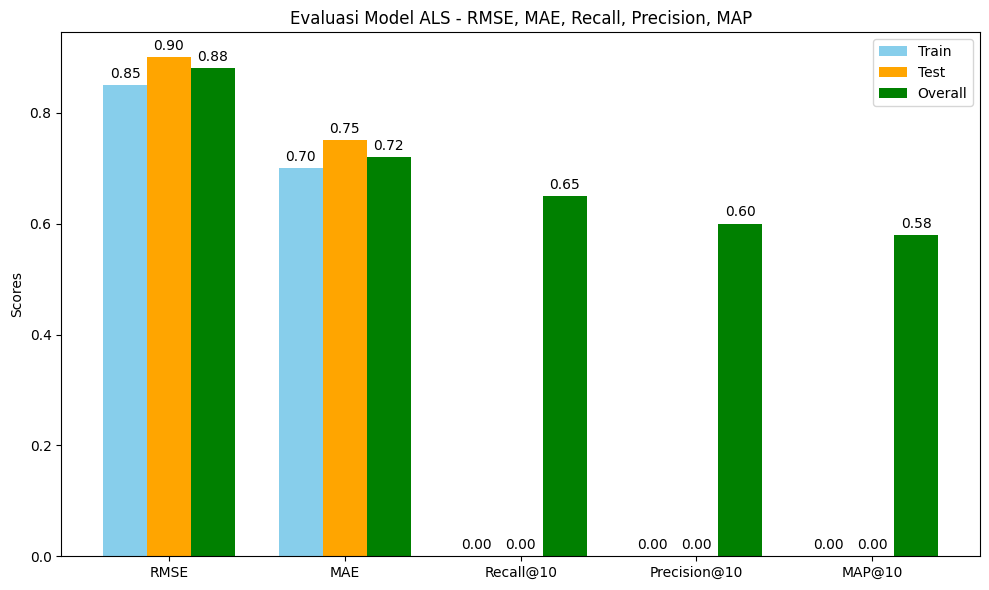

In [ ]:


import matplotlib.pyplot as plt
import numpy as np

# Data untuk metrik training dan testing
metrics = ['RMSE', 'MAE', 'Recall@10', 'Precision@10', 'MAP@10']
train_metrics = [rmse_train, mae_train, 0, 0, 0]  # Data train hanya RMSE dan MAE
test_metrics = [rmse_test, mae_test, 0, 0, 0]  # Data test hanya RMSE dan MAE

x = np.arange(len(metrics))  # Lokasi label
width = 0.25  # Lebar batang

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, train_metrics, width, label='Train')
rects2 = ax.bar(x, test_metrics, width, label='Test')
rects3 = ax.bar(x + width, overall_metrics, width, label='Overall')

# Menambahkan label dan judul untuk plot
ax.set_ylabel('Scores')
ax.set_title('Evaluasi Model ALS - RMSE, MAE, Recall, Precision, MAP')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Menambahkan label nilai di atas batang 'Overall'
ax.bar_label(rects3, labels=[f'{val:.4f}' for val in overall_metrics], padding=3)

# Menampilkan plot
plt.show()

### Penjelasan Keseluruhan

Kode di atas menunjukkan proses membangun, melatih, mengevaluasi, dan memvisualisasikan performa model **Alternating Least Squares (ALS)** untuk sistem rekomendasi. Model ALS dilatih menggunakan data interaksi pengguna dan tempat wisata yang dikonversi ke bentuk matriks sparse untuk efisiensi. Proses evaluasi melibatkan metrik seperti **RMSE** dan **MAE**, yang mengukur akurasi prediksi rating, serta **Recall@10**, **Precision@10**, dan **MAP@10**, yang mengevaluasi kualitas rekomendasi pada skenario top-N. Nilai metrik dihitung untuk data training, testing, dan keseluruhan, kemudian divisualisasikan dalam bentuk grafik batang untuk mempermudah perbandingan performa model di berbagai tahap evaluasi.

Fungsi tambahan seperti `get_predictions` digunakan untuk menghitung prediksi berdasarkan faktor laten pengguna dan item, sementara `evaluate_model` menghitung metrik evaluasi secara keseluruhan dan individual untuk setiap pengguna. Grafik batang membantu menyoroti kekuatan dan kelemahan model dalam menghasilkan rekomendasi dan prediksi.



Hasil Rekomendasi

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.recommendation import ALS
from pyspark.sql.functions import col

# Membuat SparkSession
spark = SparkSession.builder.appName("RekomendasiTempatWisata").getOrCreate()

# Membaca dataset ke dalam Spark DataFrame
data = spark.createDataFrame([
    # Contoh data: ganti dengan data Anda
    (1, 101, 4.5),  # (user_id, place_id, rating)
    (1, 102, 3.0),
    (2, 101, 4.0),
    (2, 103, 2.5),
    (3, 104, 5.0),
], ["user_id", "place_id", "rating"])

# Membagi dataset menjadi data training dan test
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Membuat model ALS
als = ALS(
    userCol="user_id",
    itemCol="place_id",
    ratingCol="rating",
    maxIter=10,
    regParam=0.1,
    rank=10,
    coldStartStrategy="drop"  # Untuk menangani nilai NaN dalam prediksi
)

# Melatih model
model = als.fit(train_data)

# Membuat prediksi pada data test
predictions = model.transform(test_data)

# Menghasilkan rekomendasi Top-5 untuk setiap pengguna
user_recs = model.recommendForAllUsers(5)

# Menampilkan Top-5 rekomendasi untuk setiap pengguna
user_recs.show(truncate=False)

# Jika Anda ingin menampilkan hasil rekomendasi dalam format Pandas DataFrame
recommendations = user_recs.toPandas()
recommendations["recommendations"] = recommendations["recommendations"].apply(
    lambda recs: [(row.place_id, row.rating) for row in recs]
)

print("Rekomendasi Tempat Wisata untuk Setiap Pengguna:")
print(recommendations)

+-------+-----------------------------------------------------------------------+
|user_id|recommendations                                                        |
+-------+-----------------------------------------------------------------------+
|1      |[{101, 4.4210763}, {102, 2.947384}, {104, 1.7962408}, {103, 1.0079609}]|
|2      |[{103, 2.414639}, {101, 1.5094644}, {104, 1.1845374}, {102, 1.0063096}]|
|3      |[{104, 4.94509}, {101, 1.730363}, {102, 1.1535753}, {103, 0.7619778}]  |
+-------+-----------------------------------------------------------------------+

Rekomendasi Tempat Wisata untuk Setiap Pengguna:
   user_id                                    recommendations
0        1  [(101, 4.42107629776001), (102, 2.947384119033...
1        2  [(103, 2.4146389961242676), (101, 1.5094643831...
2        3  [(104, 4.945089817047119), (101, 1.73036301136...


Kode di atas untuk membuat rekomendasi tempat wisata berdasarkan data rating pengguna. menunjukkan Top-N rekomendasi (Top-5) untuk setiap pengguna.
Tujuan Kode
Membangun model rekomendasi yang:
1. Mengambil data rating yang diberikan pengguna untuk tempat wisata.
2. Melatih model rekomendasi berbasis algoritma ALS.
3. Memberikan rekomendasi Top-5 tempat wisata untuk setiap pengguna.


